In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 17.74 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [3]:
#set the path to the main dir
base_dir = r'/content/datasets/Data'

#set the path to the train dir
train_dir = os.path.join(base_dir, 'train')

#set the path to the test dir
validation_dir = os.path.join(base_dir, 'test')

#directory with the training covid images
train_covid_dir = os.path.join(train_dir, 'COVID19')
#directory with the training normal images
train_normal_dir = os.path.join(train_dir, 'NORMAL')

#directory with the testing covid images
validation_covid_dir = os.path.join(validation_dir, 'COVID19')
#directory with the testing normal images
validation_normal_dir = os.path.join(validation_dir, 'NORMAL')

In [4]:
#print the filenames
train_covid_fnames = os.listdir(train_covid_dir)
train_normal_fnames = os.listdir(train_normal_dir)

print(train_covid_fnames[:5])
print(train_normal_fnames[:5])

['COVID19(60).jpg', 'COVID19(340).jpg', 'COVID19(342).jpg', 'COVID19(55).jpg', 'COVID-19 (354).jpg']
['NORMAL(309).jpg', 'NORMAL(1).jpg', 'NORMAL(103).jpg', 'NORMAL(68).jpg', 'NORMAL(1451).jpg']


In [5]:
#print the total no of images present in each dir
print('Total training covid images :', len(os.listdir(train_covid_dir)))
print('Total training normal images :', len(os.listdir(train_normal_dir)))

print('Total validation covid images :', len(os.listdir(validation_covid_dir)))
print('Total validation normal images :', len(os.listdir(validation_normal_dir)))


Total training covid images : 545
Total training normal images : 1266
Total validation covid images : 167
Total validation normal images : 317


In [6]:
BATCH_SIZE = 16

In [13]:
training_data_generator = ImageDataGenerator(
    rescale = 1.0/255.,
    zoom_range = 0.2,
    rotation_range = 15,
    width_shift_range = 0.05,
    height_shift_range = 0.05,
)

training_iterator = training_data_generator.flow_from_directory(train_dir, class_mode='binary', 
                                   color_mode='grayscale',target_size = (256, 256), batch_size=BATCH_SIZE)

Found 1811 images belonging to 2 classes.


In [14]:
validation_data_generator = ImageDataGenerator(
    rescale = 1.0/255.)

validation_iterator = validation_data_generator.flow_from_directory(validation_dir, class_mode='binary', 
                                            color_mode='grayscale',target_size = (256, 256), batch_size=BATCH_SIZE)

Found 484 images belonging to 2 classes.


In [15]:
model = Sequential()

model.add(InputLayer(input_shape=(256,256,1)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 246016)           

In [16]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [17]:
stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=40)

In [18]:
history = model.fit(
    training_iterator,
    steps_per_epoch = training_iterator.samples/BATCH_SIZE,
    epochs = 5,
    validation_data = validation_iterator,
    validation_steps = validation_iterator.samples/BATCH_SIZE,
    callbacks=[stop]
)

Epoch 1/5
113/113 [==============================] - 56s 482ms/step - loss: 0.3388 - accuracy: 0.8885 - val_loss: 0.2549 - val_accuracy: 0.9174
Epoch 2/5
113/113 [==============================] - 54s 481ms/step - loss: 0.1759 - accuracy: 0.9393 - val_loss: 0.3595 - val_accuracy: 0.9607
Epoch 3/5
113/113 [==============================] - 54s 481ms/step - loss: 0.1577 - accuracy: 0.9448 - val_loss: 0.3028 - val_accuracy: 0.9236
Epoch 4/5
113/113 [==============================] - 54s 477ms/step - loss: 0.1413 - accuracy: 0.9525 - val_loss: 0.2373 - val_accuracy: 0.8843
Epoch 5/5
113/113 [==============================] - 54s 478ms/step - loss: 0.1396 - accuracy: 0.9536 - val_loss: 0.1416 - val_accuracy: 0.9525


In [19]:
classes = training_iterator.class_indices 

In [20]:
print(classes)

{'COVID19': 0, 'NORMAL': 1}


In [5]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(256, 256))
  x = image.img_to_array(img)
  x = tf.image.rgb_to_grayscale(x)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0][0] == 1:
    prediction = 'Not Detected'
  else:
    prediction = 'Covid Detected!'
  print(prediction)

Saving 28.png to 28.png
[1.]
Not Detected


Text(0.5, 1.0, 'Training and validation loss')

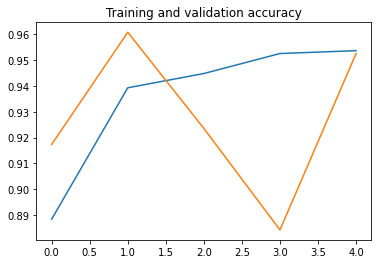

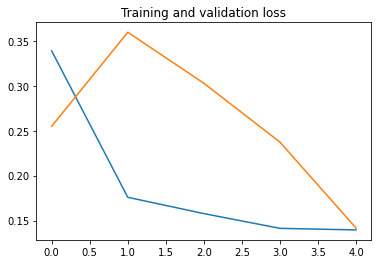

In [27]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [3]:
from keras.models import  load_model

In [29]:
model.save("Covid_detection_model.h5")

In [4]:
model = load_model('/content/Covid_detection_model.h5')